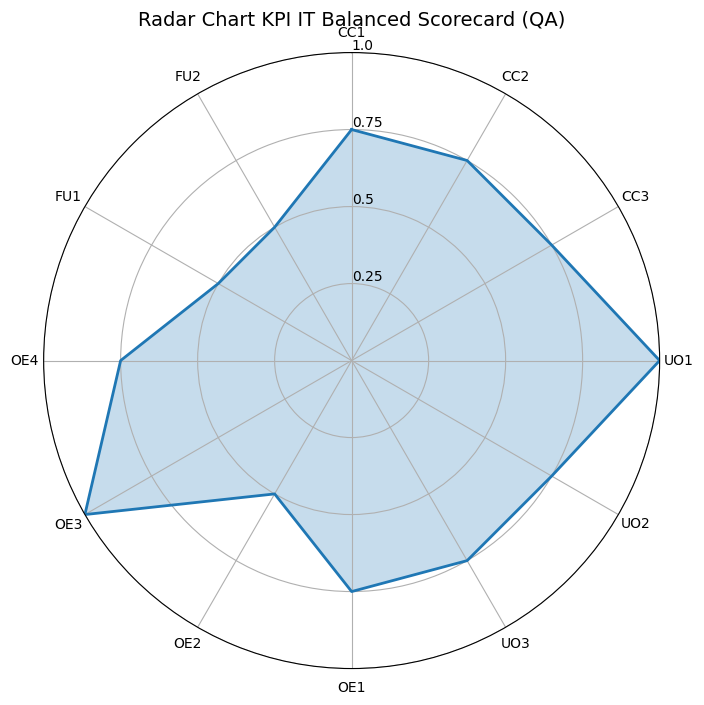

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. DATA KPI
# =========================
data = {
    "Code": ["CC1","CC2","CC3","UO1","UO2","UO3",
             "OE1","OE2","OE3","OE4","FU1","FU2"],
    "Skor": [3,3,3,4,3,3,3,2,4,3,2,2],
    "Target": [4]*12
}

df = pd.DataFrame(data)

# Normalisasi skor terhadap target
df["Score_Normalized"] = df["Skor"] / df["Target"]

# =========================
# 2. SETUP RADAR CHART
# =========================
labels = df["Code"].tolist()
values = df["Score_Normalized"].tolist()

# Tutup polygon
values += values[:1]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# =========================
# 3. PLOT
# =========================
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_rlabel_position(0)

ax.set_ylim(0,1)
ax.set_yticks([0.25,0.5,0.75,1.0])
ax.set_yticklabels(["0.25","0.5","0.75","1.0"])

ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

plt.title("Radar Chart KPI IT Balanced Scorecard (QA)", size=14, pad=20)
plt.show()


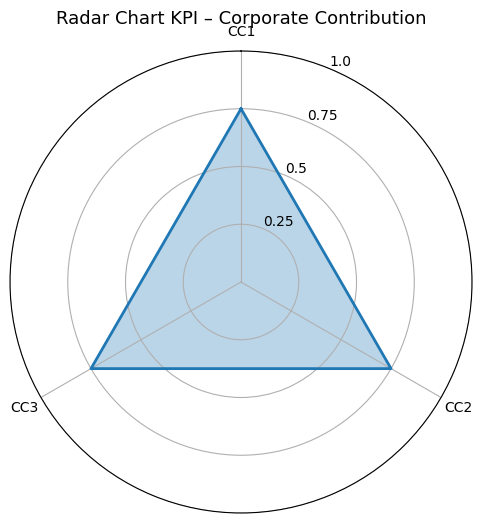

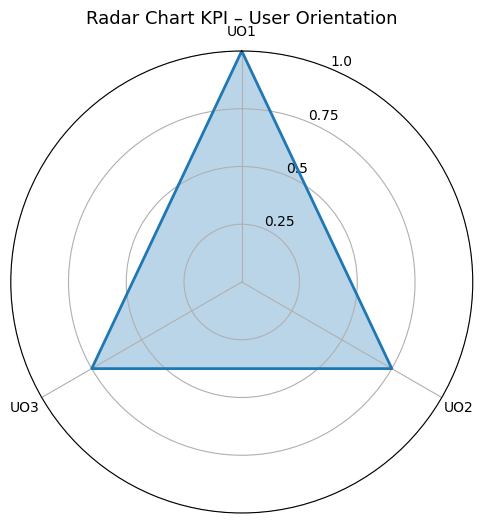

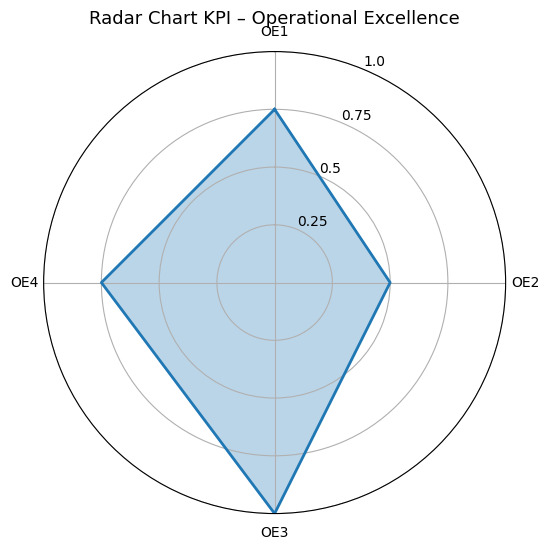

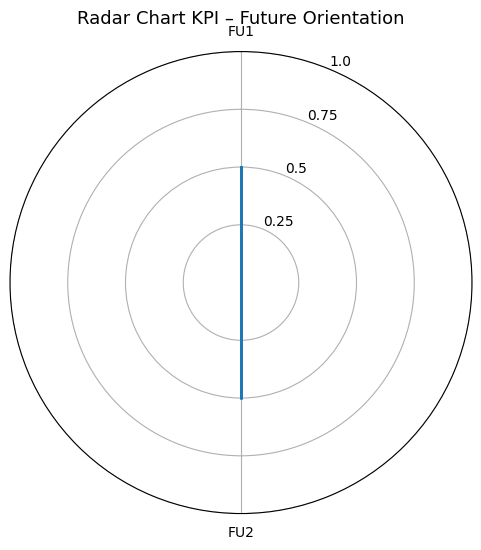

In [2]:
import pandas as pd
import plotly.graph_objects as go

# =========================
# 1. DATA KPI
# =========================
data = {
    "Code": ["CC1","CC2","CC3",
             "UO1","UO2","UO3",
             "OE1","OE2","OE3","OE4",
             "FU1","FU2"],
    "Perspective": [
        "Corporate Contribution","Corporate Contribution","Corporate Contribution",
        "User Orientation","User Orientation","User Orientation",
        "Operational Excellence","Operational Excellence","Operational Excellence","Operational Excellence",
        "Future Orientation","Future Orientation"
    ],
    "Skor": [3,3,3,4,3,3,3,2,4,3,2,2],
    "Target": [4]*12
}

df = pd.DataFrame(data)
df["Score_Normalized"] = df["Skor"] / df["Target"]

# =========================
# 2. RADAR CHART PER PERSPEKTIF (INTERAKTIF)
# =========================
for perspective in df["Perspective"].unique():
    sub_df = df[df["Perspective"] == perspective]

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=sub_df["Score_Normalized"],
        theta=sub_df["Code"],
        fill='toself',
        name=perspective,
        hovertemplate=
            "<b>KPI:</b> %{theta}<br>" +
            "<b>Skor:</b> %{customdata[0]}<br>" +
            "<b>Target:</b> 4<br>" +
            "<b>Realisasi:</b> %{r:.2f}<extra></extra>",
        customdata=sub_df[["Skor"]].values
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0,1]
            )
        ),
        title=f"Radar Chart KPI – {perspective}",
        showlegend=False
    )

    fig.show()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. DATA KPI + PERSPEKTIF
# =========================
data = {
    "Code": ["CC1","CC2","CC3",
             "UO1","UO2","UO3",
             "OE1","OE2","OE3","OE4",
             "FU1","FU2"],
    "Perspective": [
        "Corporate Contribution","Corporate Contribution","Corporate Contribution",
        "User Orientation","User Orientation","User Orientation",
        "Operational Excellence","Operational Excellence","Operational Excellence","Operational Excellence",
        "Future Orientation","Future Orientation"
    ],
    "Skor": [3,3,3,4,3,3,3,2,4,3,2,2],
    "Target": [4]*12
}

df = pd.DataFrame(data)
df["Score_Normalized"] = df["Skor"] / df["Target"]

# =========================
# 2. FUNCTION RADAR CHART
# =========================
def radar_chart(sub_df, title):
    labels = sub_df["Code"].tolist()
    values = sub_df["Score_Normalized"].tolist()

    values += values[:1]
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_ylim(0,1)
    ax.set_yticks([0.25,0.5,0.75,1.0])
    ax.set_yticklabels(["0.25","0.5","0.75","1.0"])

    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.3)

    plt.title(title, size=13, pad=20)
    plt.show()

# =========================
# 3. PLOT PER PERSPEKTIF
# =========================
for perspective in df["Perspective"].unique():
    radar_chart(
        df[df["Perspective"] == perspective],
        f"Radar Chart KPI – {perspective}"
    )
